In [20]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [21]:
api_key = ""
api_secret= ""
access_token = ""
access_secret = ""

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_secret)
api=tweepy.API(auth,wait_on_rate_limit=True)

In [22]:
tweets = api.user_timeline(screen_name = "BarackObama", count = 200, lang = "en", tweet_mode = "extended")
i = 1
for tweet in tweets[0:5]:
  print(str(i)+'. '+tweet.full_text+'\n')
  i+=1

1. Michelle and I want every kid in Chicago to grow up knowing even better opportunities than we had. We’re happy to help Chicago Connected reach every kid in the city. This is where I found a purpose and a family––and it’ll always be our home. https://t.co/ofSCxK8cJC

2. RT @UniNoticias: 👉 En exclusiva el expresidente @BarackObama envió un mensaje especial a los hispanos sobre la importancia de salir a votar…

3. I’m joining my friend @JoeBiden tomorrow to talk about everything that’s at stake in this election. 

I hope you’ll join us, too. This is a critical moment in our history––and all of us have to do our part to build this country into what we know it can be. https://t.co/diQxk3uFH2

4. Juneteenth has never been a celebration of victory, or an acceptance of the way things are. It's a celebration of progress. It's an affirmation that despite the most painful parts of our history, change is possible––and there is still so much work to do.
https://t.co/5XCRdnk3iR

5. ...and now to 

In [23]:
df = pd.DataFrame([tweet.full_text for tweet in tweets], columns = ['Tweets'])
df.head()

,Tweets
0,Michelle and I want every kid in Chicago to gr...
1,RT @UniNoticias: 👉 En exclusiva el expresident...
2,I’m joining my friend @JoeBiden tomorrow to ta...
3,Juneteenth has never been a celebration of vic...
4,"...and now to stand up for those ideals, we ha..."


In [24]:
def clean(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  text = re.sub(r'#', '', text) 
  text = re.sub(r'RT[\s]+', '', text) 
  text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
  text = re.sub(r'_', '', text)
  text = re.sub(r':', '', text) 
  text = re.sub(r'%', '', text)
  return text

df['Tweets']=df['Tweets'].apply(clean)
df.head()

,Tweets
0,Michelle and I want every kid in Chicago to gr...
1,👉 En exclusiva el expresidente envió un mens...
2,I’m joining my friend tomorrow to talk about ...
3,Juneteenth has never been a celebration of vic...
4,"...and now to stand up for those ideals, we ha..."


In [25]:
df['id'] = np.array([tweet.id for tweet in tweets])
df['len'] = np.array([len(tweet.full_text) for tweet in tweets])
df['date'] = np.array([tweet.created_at for tweet in tweets])
df['source'] = np.array([tweet.source for tweet in tweets])
df['likes'] = np.array([tweet.favorite_count for tweet in tweets])
df['retweets'] = np.array([tweet.retweet_count for tweet in tweets])
df

,Tweets,id,len,date,source,likes,retweets
0,Michelle and I want every kid in Chicago to gr...,1276240519182647297,265,2020-06-25 19:47:05,Twitter for iPhone,76826,9159
1,👉 En exclusiva el expresidente envió un mens...,1275912896791433217,140,2020-06-24 22:05:14,Twitter for iPhone,0,1218
2,I’m joining my friend tomorrow to talk about ...,1275103999474229249,280,2020-06-22 16:30:58,Twitter Web App,125315,23781
3,Juneteenth has never been a celebration of vic...,1274021940760641536,278,2020-06-19 16:51:15,Twitter Web App,363750,76954
4,"...and now to stand up for those ideals, we ha...",1273637698012614664,244,2020-06-18 15:24:24,Twitter for iPhone,196098,25214
...,...,...,...,...,...,...,...
195,Saw this story of a young person doing great w...,1166808878807470086,148,2019-08-28 20:24:49,Twitter for iPhone,69544,10341
196,Training is at the heart of organizing. It’s w...,1166068183289253889,270,2019-08-26 19:21:34,Twitter for iPhone,21773,4191
197,"With summer winding down, here’s a sampling of...",1165286625208950784,173,2019-08-24 15:35:56,Twitter for iPhone,680474,112055
198,A good story gives you the chance to better un...,1164192919047299072,304,2019-08-21 15:09:56,Twitter Media Studio,127419,22883


In [26]:
def subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def polarity(text):
  return TextBlob(text).sentiment.polarity

def analysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


df['Subjectivity'] = df['Tweets'].apply(subjectivity)
df['Polarity'] = df['Tweets'].apply(polarity)
df['Analysis']=df['Polarity'].apply(analysis)
df[0:10]

,Tweets,id,len,date,source,likes,retweets,Subjectivity,Polarity,Analysis
0,Michelle and I want every kid in Chicago to gr...,1276240519182647297,265,2020-06-25 19:47:05,Twitter for iPhone,76826,9159,0.750000,6.500000e-01,Positive
1,👉 En exclusiva el expresidente envió un mens...,1275912896791433217,140,2020-06-24 22:05:14,Twitter for iPhone,0,1218,0.000000,0.000000e+00,Neutral
2,I’m joining my friend tomorrow to talk about ...,1275103999474229249,280,2020-06-22 16:30:58,Twitter Web App,125315,23781,0.800000,0.000000e+00,Neutral
3,Juneteenth has never been a celebration of vic...,1274021940760641536,278,2020-06-19 16:51:15,Twitter Web App,363750,76954,0.533333,1.850372e-17,Positive
4,"...and now to stand up for those ideals, we ha...",1273637698012614664,244,2020-06-18 15:24:24,Twitter for iPhone,196098,25214,0.966667,3.777778e-01,Positive
5,"Eight years ago this week, we protected young ...",1273637590013480961,273,2020-06-18 15:23:59,Twitter for iPhone,578262,86988,0.400000,1.800000e-01,Positive
6,And here are two more essays that powerfully e...,1272914550917038081,248,2020-06-16 15:30:53,Twitter Web App,30170,5326,0.740000,-2.000000e-01,Negative
7,These Nashville teenagers are representative o...,1272914549415477248,171,2020-06-16 15:30:52,Twitter Web App,87678,12089,0.575000,4.250000e-01,Positive
8,Today reminds us that progress might be slow. ...,1272696969899708417,193,2020-06-16 01:06:17,Twitter Web App,757223,104559,0.800000,1.666667e-01,Positive
9,This young generation makes me optimistic abou...,1271147934608953345,245,2020-06-11 18:30:59,Twitter Web App,44481,5957,0.408333,1.666667e-01,Positive


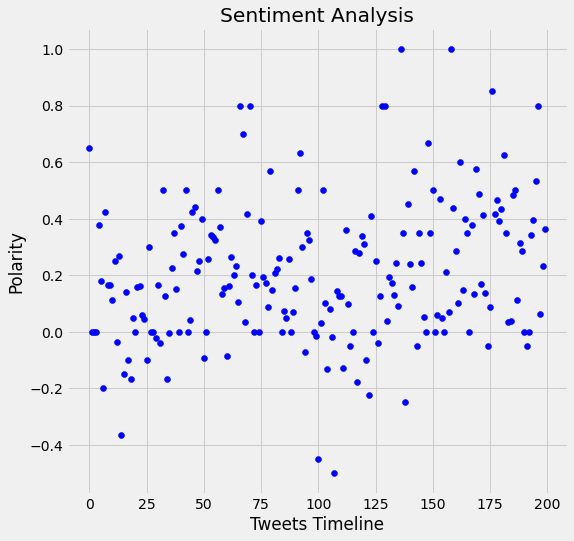

In [27]:
plt.figure(figsize=(8,8))
for i in range(df.shape[0]):
  plt.scatter(i,df['Polarity'][i],color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Tweets Timeline')
plt.ylabel('Polarity')
plt.show()

In [28]:
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
print('Percentage of positive tweets: '+str(round((ptweets.shape[0] / df.shape[0]) *100, 1)))

ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
print('Percentage of negative tweets: '+str(round((ntweets.shape[0] / df.shape[0]) *100, 1)))

Percentage of positive tweets: 75.0
Percentage of negative tweets: 14.5


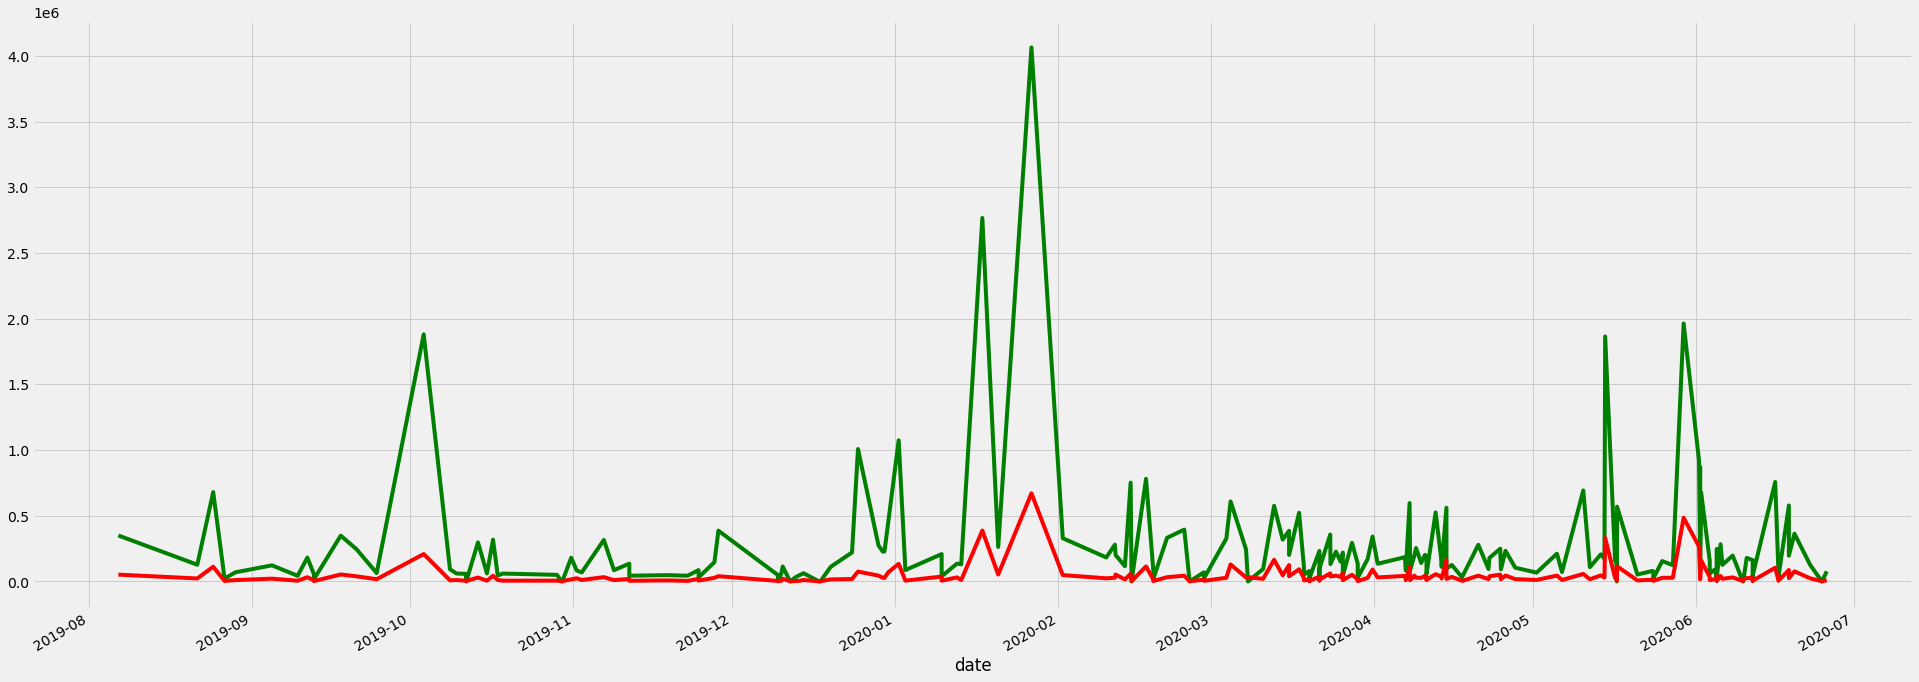

In [29]:
likes_timeline=pd.Series(df['likes'].values,index=df['date'])
likes_timeline.plot(figsize=(30,12),color='g')

likes_timeline=pd.Series(df['retweets'].values,index=df['date'])
likes_timeline.plot(figsize=(30,12),color='r')

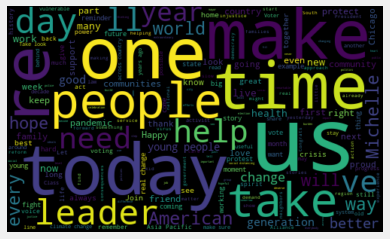

In [48]:
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size = 119).generate(allwords)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()